# Introduction
A marketing team of a large online store has compiled a list of hypotheses that may help boost revenue.

## Project goal
1. Prioritize the list of hypotheses
2. Test the most urgent hypothesis
3. Analyze results

### Hypotheses list
0. Add two new channels for attracting traffic. This will bring 30% more users.
1. Launch your own delivery service. This will shorten delivery time.
2. Add product recommendation blocks to the store's site. This will increase conversion and average purchase size.
3. Change the category structure. This will increase conversion since users will find the products they want more quickly.
4. Change the background color on the main page. This will increase user engagement.
5. Add a customer review page. This will increase the number of orders.
6. Show banners with current offers and sales on the main page. This will boost conversion.
7. Add a subscription form to all the main pages. This will help you compile a mailing list.
8. Launch a promotion that gives users discounts on their birthdays.




## Importing libraries and reading files

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
#reading data files, defining date columns as date dtype
hypotheses = pd.read_csv('hypotheses_us.csv', sep=';')
orders = pd.read_csv('orders_us.csv', parse_dates = ['date'])
visits = pd.read_csv('visits_us.csv', parse_dates = ['date'])

# Prioritizing Hypotheses:
There is little place for preprocessing on hypotheses table as it is very small.
We will first choose a hypothesis to work with. then preprocess the rest of the data.

**Hypotheses table** — contains all the hypotheses and their values.
- **Columns:**
    - `Hypotheses` — brief descriptions of the hypotheses.
    - `Reach` — user reach, on a scale of one to ten.
    - `Impact` — impact on users, on a scale of one to ten.
    - `Confidence` — confidence in the hypothesis, on a scale of one to ten.
    - `Effort` — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.

## Hypothesis table
- Pre - preprocessing
    - Lowering column cases to be easier to work with
    - Forcing pandas to fully display `hypothesis` values by fitting as many as 200 characters in columns
- Showing table

In [3]:
hypotheses.columns = hypotheses.columns.str.lower()  #Lowering column cases to be easier to work with

pd.set_option('max_colwidth', 200) #Forcing pandas to display up to 200 characters in columns

hypotheses

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


## Prioritizing hyptheses
### ICE and RICE scoring

- ***R***each — how many users will be reached
- ———
- ***I***mpact — how strong the impact will affect the users
- ***C***onfidence — level of confidence in determining the other parameter scores.
- ***E***ffort — level of effort to actually launch and test the hypethesis

### Calculating ICE and RICE, with a twist
In order to easily compare the two, RICE will be divided by 10 to match the ICE scale, Explanation:
- In RICE we multiply 3 different scores in each other, and divide them by effort score. To a maximum score of 1000.
    - Each score maximum value is 10,  (reach * impact * confidence, or 10*10*10 = 1000)
        - Then we divide that score by Effort score, it's minimum is 1 so the maximum score is 1000 / 1 = 1000.
- In ICE we multiply 2 different scores by each other, and divide them by effort score. To a maximum score of 100.
    - Each score maximum value is 10,  (reach * impact * confidence, or 10*10 = 100)
        - Then we divide that score by Effort score, it's minimum is 1 so the maximum score is 100 / 1 = 100.
        
**Therefore, for an easy comparison, RICE will be divided by 10 again. To match the scale of ICE.**

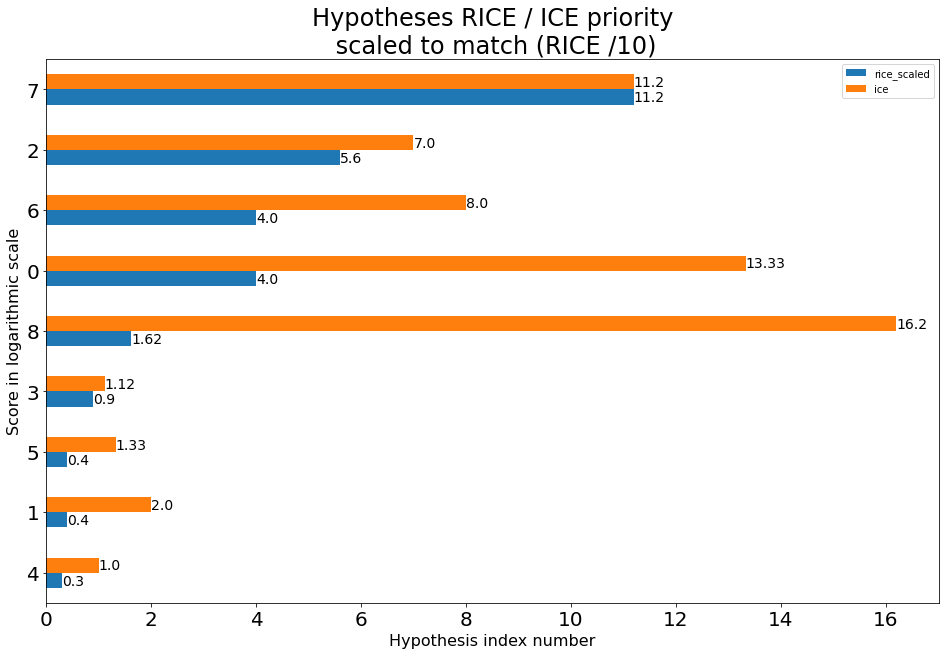

,hypothesis,reach,impact,confidence,effort,ice,rice,rice_scaled
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.33,40.0,4.00
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.00,4.0,0.40
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.00,56.0,5.60
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.12,9.0,0.90
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.00,3.0,0.30
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.33,4.0,0.40
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.00,40.0,4.00
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.20,112.0,11.20
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.20,16.2,1.62


In [4]:
#calculating ICE:
hypotheses['ice'] = ((hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']).round(2)

#calculating RICE:
hypotheses['rice'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']

#scaling RICE down:
hypotheses['rice_scaled'] = hypotheses['rice'] /10

scaledplot = hypotheses.sort_values('rice').plot(y=["rice_scaled", "ice"], kind="barh", figsize = (16, 10))
plt.title('Hypotheses RICE / ICE priority\n scaled to match (RICE /10)', size = 24)

plt.xlabel('Hypothesis index number', size = 16)
plt.ylabel('Score in logarithmic scale', size = 16)
plt.tick_params(axis = 'both', labelsize  = 20)
for bar in scaledplot.patches:
    plt.annotate(bar.get_width().round(2), (bar.get_width(), bar.get_y()),
                 ha='left', va='bottom', size = 14, xytext=(0, 0), textcoords='offset points', fontweight = 'medium')
plt.show()

hypotheses

## Hypothesis 7 has the highest RICE score by far (112)
### Hypothesis 7 — `Add a subscription form to all the main pages. This will help you compile a mailing list.`
- This hypothesis has a RICE score of 112, double than the second highest hypothesis(56), and much higher than any other hypothesis suggested, and should be tested first.
- The RICE and ICE ratings differ because in RICE there is also the reach factor thrown into the package, meaning one more multiplying number to our calculation (**R\*I\*C \/ E** <--vs.--> **I\*C \/ E**). this also means sometimes the two methods will show different priority scores to the same hypothesis.<br>
- The reach factor is important to tell how many users will be affected by the feature. Therefore it is best to stick with the RICE rating.


# Inspecting and preprocessing the data:

## `orders`
- This table shows information on the orders placed by visitors  during the month of August 2019.
- It contains following columns:
    - `transactionid` — order identifier.
    - `visitorid` — identifier of the user who placed the order.
    - `date` — of the order.
    - `revenue` — from the order.
    - `group` — the A/B test group that the user belongs to.

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [6]:
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


In [7]:
orders.nunique()

transactionId    1197
visitorId        1031
date               31
revenue           403
group               2
dtype: int64

## No duplicates and missing values

In [8]:
print('Duplicates:')
display(orders.duplicated().sum())

print('---------------')
print('Missing values:')
display(orders.isnull().sum())

Duplicates:


0

---------------
Missing values:


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

## remove higher case letters from the columns

In [9]:
orders.columns = orders.columns.str.lower()
orders.sample(3)

,transactionid,visitorid,date,revenue,group
162,2634363174,2892265953,2019-08-17,35.6,A
60,1421016313,4256040402,2019-08-16,875.5,B
373,4140190337,249864742,2019-08-24,10.5,B


## Orders have no duplicates or missing values, and dtypes are right
**But** There are users on `visitorid` that are listed in both `groups` A and B!

In [10]:
#defining unique users in group A and B, and comparing both groups to find users who are listed in both.
a_users = orders[orders['group'] == 'A']['visitorid'].unique()
b_users = orders[orders['group'] == 'B']['visitorid'].unique()
naughty_users = [doubles for doubles in a_users if doubles in b_users]

#showing some numbers:
print(
    'Group A has {} unique users.\n'
    'Group B has {} unique users.\n'
    'There are {} users who are listed in both groups.\n'
    'This is {:.2%} of the total users. (!!)'
    .format(len(a_users), len(b_users), len(naughty_users), len(naughty_users) / orders['visitorid'].nunique()))

Group A has 503 unique users.
Group B has 586 unique users.
There are 58 users who are listed in both groups.
This is 5.63% of the total users. (!!)


## To drop? or not to drop?  (spoiler - drop!)
- There are 58 users listed in both the test group, and the control group, dropping these users is necessary because it distorts the testing results.
- But dropping them from the `orders` table has issues we need to be aware of:
    - It will probably leave their data in the `visits` table. And it is not possible with our dataset to find and remove the data of these users from the `visits` table.
    - Therefore leaving their data in the `visits` table will slightly lower the conversion value.
    
**Since false hypothesis test is far worse than a slightly lower conversion value, these users will be removed from the `orders` table after all.**

In [11]:
print('There are {} rows in orders table before removing users who are listed in both groups.'.format(len(orders)))

#removing the double group users from the orders table:
orders = orders[~orders['visitorid'].isin(naughty_users)]

print('There are {} rows in orders table after removing users who are listed in both groups.'.format(len(orders)))

There are 1197 rows in orders table before removing users who are listed in both groups.
There are 1016 rows in orders table after removing users who are listed in both groups.


## `visits`
- This table shows information on how many visits each group had during the month of August 2019.
- It contains the following columns
    - `date` — date.
    - `group` — A/B test group.
    - `visits` — the number of visits on the date specified in the A/B test group specified.

In [12]:
visits.sample(5)

,date,group,visits
38,2019-08-08,B,654
11,2019-08-12,A,595
19,2019-08-20,A,575
48,2019-08-18,B,737
60,2019-08-30,B,490


In [13]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [14]:
visits.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [15]:
visits.nunique()

date      31
group      2
visits    58
dtype: int64

## No duplicates or missing values

In [16]:
print('Duplicates:')
display(visits.duplicated().sum())

print('---------------')
print('Missing values:')
display(visits.isnull().sum())

Duplicates:


0

---------------
Missing values:


date      0
group     0
visits    0
dtype: int64

## Data inspecting and precprocessing summary:

- The orders table column names changed to lower-case.
- There were no missing values or duplicates in both orders and visits tables.
- The orders table however had 58 visitor id's who were listed on both group A and B. These users were completely removed from the data.


# A/B Testing
## Hypothesis 7
`Add a subscription form to all the main pages. <br>This will help you compile a mailing list.`

In [17]:
#get unique dates from orders:
dates_group = orders[['date','group']].drop_duplicates()

#create a table from matching or prior dates and matching groups, forming the different aggregations on it's columns:
order_agg = dates_group.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique,
          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#doing the same with the visitors table:
visit_agg = dates_group.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])]
            .agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

#merging the two tables:
cum_df = order_agg.merge(visit_agg, left_on=['date', 'group'], right_on=['date', 'group'])\
.rename(columns = {'transactionid' : 'orders', 'visitorid' : 'buyers', 'visitors' : 'visits'})
cum_df.head()

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


## Cumulative revenue by group:

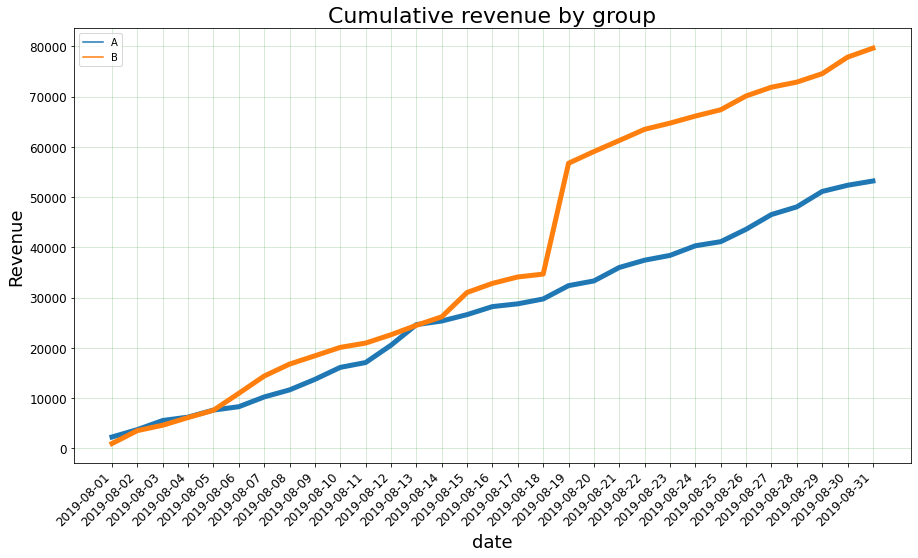

In [18]:
plt.figure(figsize = (15, 8))
sns.lineplot(data = cum_df, x = 'date', y = 'revenue', hue = 'group', linewidth = 5)
plt.grid(alpha = 0.2, color = 'g')
plt.title('Cumulative revenue by group', size = 22)
plt.ylabel('Revenue', size = 18)
plt.xlabel('date', size = 18)
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(cum_df['date'].unique(), rotation=45, ha = 'right')
plt.show()

checking what happened on the Aug-19 that made such a big revenue to group B:

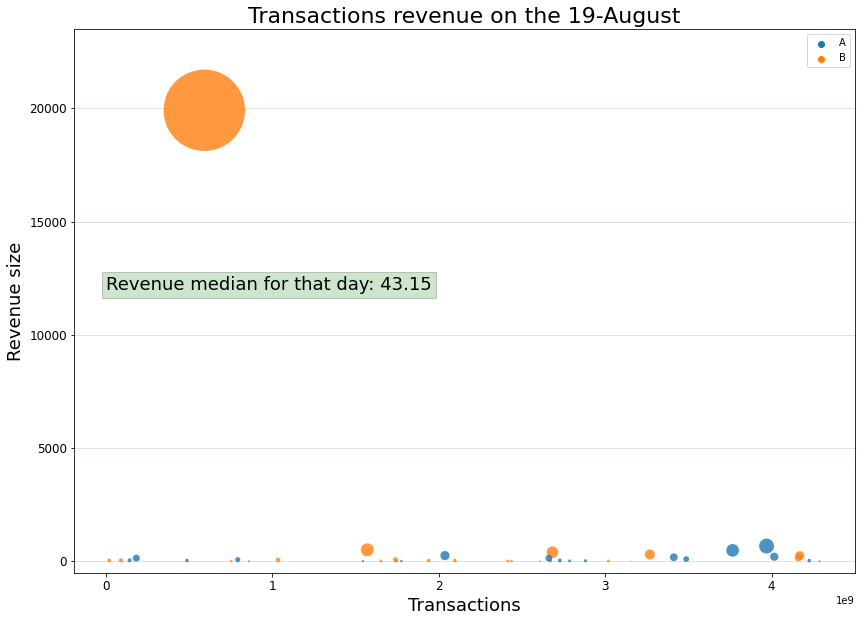

,transactionid,visitorid,date,revenue,group
425,590470918,1920142716,2019-08-19,19920.4,B
530,3970235543,2912540959,2019-08-19,680.8,A
527,1570513684,2837914161,2019-08-19,515.9,B


In [37]:
#select all orders from August 19:
aug19 = orders[orders['date'] == '2019-08-19']

#drawing them as a scatterplot:
plt.figure(figsize = (14, 10))
sns.scatterplot(data = aug19, y = 'revenue', x = 'transactionid', hue = 'group', s = aug19['revenue'] / 3, zorder = 3,
                                                                                                                alpha = 0.8)
plt.ylim(-500, 23500)
plt.grid(axis = 'y', alpha = 0.2, color = 'g')
plt.text(0, 12000, "Revenue median for that day: {:.2f}".format(aug19['revenue'].median()), bbox = dict(facecolor = 'g',
                                                                                                        alpha = 0.2), size = 18)
plt.title('Transactions revenue on the 19-August', size = 22)
plt.ylabel('Revenue size', size = 18)
plt.xlabel('Transactions', size = 18)
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

#printing 3 largest revenues:
aug19.sort_values('revenue', ascending = False).head(3)

###  Cumulative revenue by group conclusion:
- The groups had similar revenue, until August 19 where group B has gotten a big adventage in revenue. the revenue since then kept a similar raise for both groups.
- In August 19, the was one HUGE order of almost 20k (transactionid = 590470918), this explains the big jump in revenue for group B.

## Cumulative average order size by group:

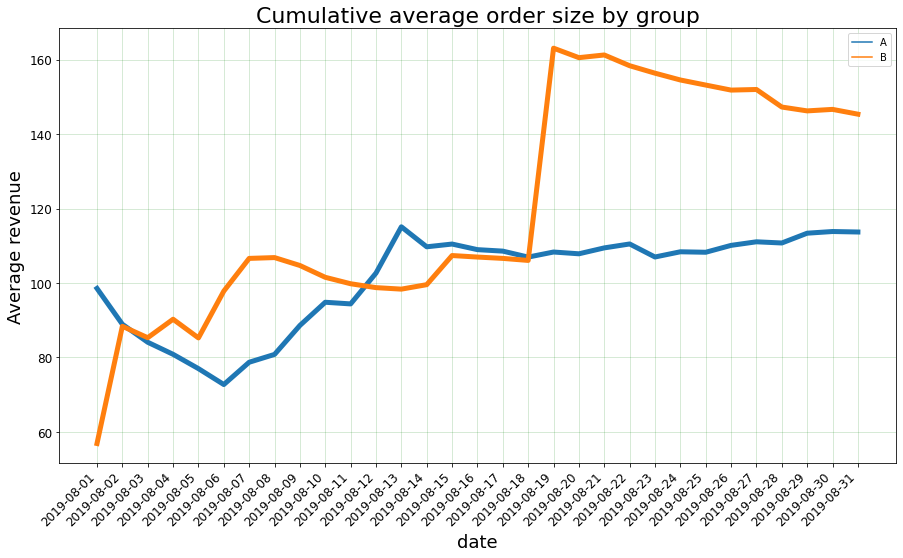

In [20]:
plt.figure(figsize = (15, 8))
sns.lineplot(data = cum_df, x = 'date', y = (cum_df['revenue'] / cum_df['orders']), hue = 'group', linewidth = 5)
plt.grid(alpha = 0.2, color = 'g')
plt.title('Cumulative average order size by group', size = 22)
plt.ylabel('Average revenue', size = 18)
plt.xlabel('date', size = 18)
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(cum_df['date'].unique(), rotation=45, ha = 'right')
plt.show()

### Cumulative average order size by group conculusion:
- Similar to the previous cumulative revenue graph, we can see the big rise in  Aug-19.
- Group B had a better start until Aug-12, then B matched it and got a little better revenue in average, until Aug-19, and on.
- We must keep in mind that without the 20k order group A is likely to have better revenues on average after Aug-12.

## Relative difference in cumulative average order size for group B compared with group A

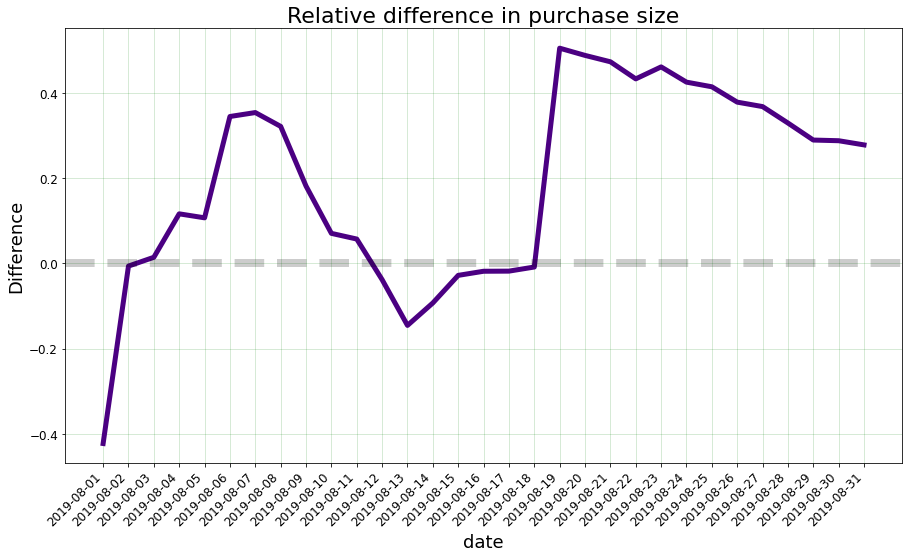

In [63]:
#Creating a table merged from cumulative revenue and orders for each group:
cum_a = cum_df[cum_df['group']=='A'][['date','revenue', 'orders']]
cum_b = cum_df[cum_df['group']=='B'][['date','revenue', 'orders']]
cum_ab = cum_a.merge(cum_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#drawing a graph with relative difference between B and A group purchase sizes:
plt.figure(figsize = (15, 8))
sns.lineplot(data = cum_ab, x = 'date', y = ((cum_ab['revenueB']/cum_ab['ordersB'])/(cum_ab['revenueA']/cum_ab['ordersA'])-1), linewidth = 5, color = 'indigo')
plt.axhline(y=0, color='black', linestyle='--', linewidth = 8, alpha = 0.2)
plt.grid(alpha = 0.2, color = 'g')
plt.title('Relative difference in purchase size', size = 22)
plt.ylabel('Difference', size = 18)
plt.xlabel('date', size = 18)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(cum_ab['date'].unique(), rotation=45, ha = 'right')
plt.show()

### Relative difference in cumulative average order size comclusions:
- Just on the 4th day (Aug-04) we can see group B started to rise above A, falling back below group A only for a week, then there was that known huge purchase that raised group B back to top.
- BUT without that outlier we would probably see group B declining below group A

##  Group conversion rate (the ratio of orders, to the number of visits for each day)

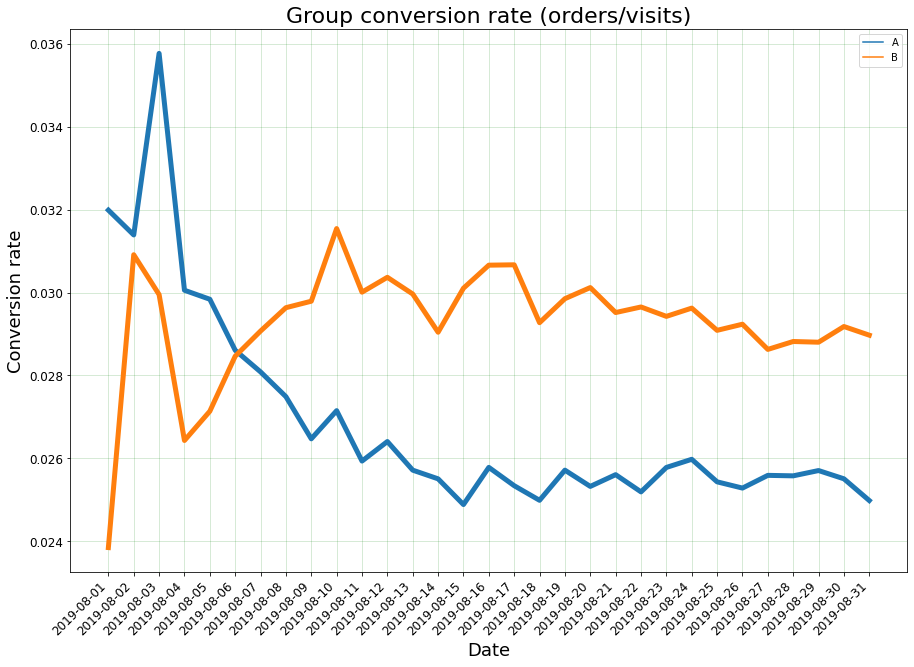

In [22]:
#calculating cumulative conversion rate:
cum_df['conversion'] = cum_df['orders'] / cum_df['visits']

#drawing lines:
plt.figure(figsize = (15, 10))
sns.lineplot(data = cum_df, x = 'date', y = 'conversion', linewidth = 5, hue = 'group')
plt.grid(alpha = 0.2, color = 'g')
plt.title('Group conversion rate (orders/visits)', size = 22)
plt.ylabel('Conversion rate', size = 18)
plt.xlabel('Date', size = 18)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(cum_ab['date'].unique(), rotation=45, ha = 'right')
plt.legend()
plt.show()

###  Group conversion rate conclusions:
- Group B started very low, it took about 10-13 days for matters to stabilize and we can see that group B has a bigger conversion rate since Aug-07 onwards.
- It is worth to mention that there was a big positive spike in both groups conversion rates at Aug-02(B), and Aug-03(A). and then group B had a large fall at August-04. without these spikes, perhaps matters would stabilize much earlier.

## scatter chart of the number of orders per user:

In [23]:
orders[['visitorid', 'transactionid']].groupby('visitorid', as_index=False).agg({'transactionid': pd.Series.nunique})

,visitorid,transactionid
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1
...,...,...
968,4259830713,1
969,4278982564,1
970,4279090005,1
971,4281247801,1


In [55]:
user_orders = orders.groupby(['visitorid', 'group'], as_index = False)['transactionid'].count().rename(
                                                                                columns = {'transactionid' : 'orders'})

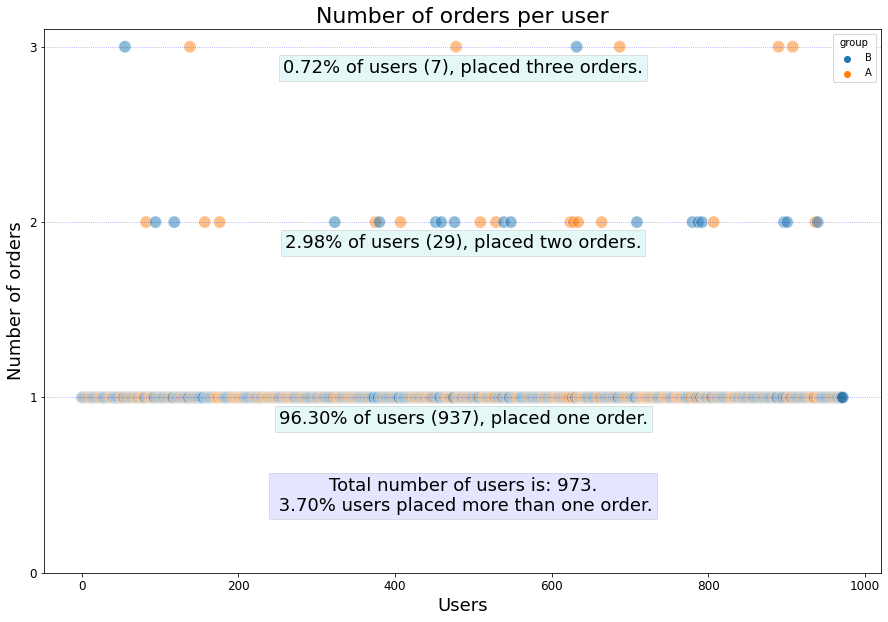

In [60]:
#creating orders per user from counting unique transaction ids in groupby visitorid:
user_orders = orders.groupby(['visitorid', 'group'], as_index = False)['transactionid'].count().rename(
                                                                                        columns = {'transactionid' : 'orders'})

#scattering some circles:
plt.figure(figsize=(15,10))
sns.scatterplot(data = user_orders, x = user_orders.index, y = 'orders', color = 'indigo', alpha = 0.5, hue = 'group', s = 150)
plt.title('Number of orders per user', size = 22)
plt.xlabel('Users', size = 18)
plt.ylabel('Number of orders', size = 18)
plt.yticks(np.arange(0, user_orders.orders.max() + 1, 1))
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(axis = 'y', alpha = 0.4, color = 'b', ls = ':')


#adding text info:
plt.text(487, 2.85, '{:.2%} of users ({}), placed three orders.'
 .format(user_orders[user_orders['orders'] == 3]['orders'].count() / len(user_orders['visitorid']),
 user_orders[user_orders['orders'] == 3]['orders'].count()),
         bbox = dict(facecolor = 'c', alpha = 0.1), size = 18, ha = 'center')

plt.text(487, 1.85, '{:.2%} of users ({}), placed two orders.'
 .format(user_orders[user_orders['orders'] == 2]['orders'].count() / len(user_orders['visitorid']),
 user_orders[user_orders['orders'] == 2]['orders'].count()),
         bbox = dict(facecolor = 'c', alpha = 0.1), size = 18, ha = 'center')

plt.text(487, 0.85, '{:.2%} of users ({}), placed one order.'
 .format(user_orders[user_orders['orders'] == 1]['orders'].count() / len(user_orders['visitorid']),
 user_orders[user_orders['orders'] == 1]['orders'].count()), bbox = dict(facecolor = 'c',alpha = 0.1),size = 18, ha = 'center')

plt.text(487, 0.35, 'Total number of users is: {}.\n {:.2%} users placed more than one order.'.format(
    len(user_orders['visitorid']),user_orders[user_orders['orders'] > 1]['orders'].count() / len(user_orders['visitorid'])),
     bbox = dict(facecolor = 'b', alpha = 0.1), size = 18, ha = 'center')

plt.show()

### scatter chart conclusions:
- AS shown in the graph:
    - only 3.7% of the users placed more than one order, or in revers: 96.3% only placed one order.

## The 95th and 99th percentiles for the number of orders per user.
Defining the point at which a data point becomes an anomaly.

In [25]:
#finding percentage threshold for orders per user outliers:
print(np.percentile(user_orders['orders'], [95, 96, 97, 99, 99.4])) 

[1. 1. 2. 2. 3.]


### Any orders that are more 2 should be an anomally and removed.
- No more than 4% of the users placed 1 order,  and no more than 1% placed 2 orders.

## A scatter chart of order prices:

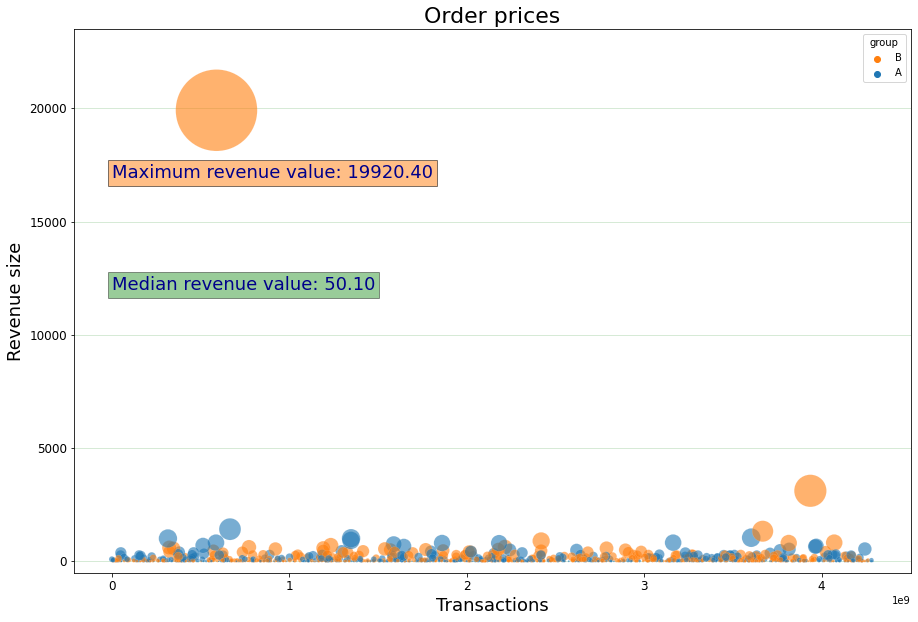

In [65]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = orders, x = 'transactionid', y = 'revenue', hue = 'group', palette = ['#ff7f0e', '#1f77b4'],
                                                                    s= orders['revenue'] / 3, alpha = 0.6, zorder = 3) 
plt.ylim(-500, 23500)
plt.grid(axis = 'y', alpha = 0.2, color = 'g')
plt.text(0, orders['revenue'].max() - 3000, "Maximum revenue value: {:.2f}".format(orders['revenue'].max()), bbox = dict(facecolor = '#ff7f0e', alpha = 0.5), size = 18, color = 'darkblue')
plt.text(0, 12000, "Median revenue value: {:.2f}".format(orders['revenue'].median()), bbox = dict(facecolor = 'g', alpha = 0.4), size = 18, color = 'darkblue')
plt.title('Order prices', size = 22)
plt.ylabel('Revenue size', size = 18)
plt.xlabel('Transactions', size = 18)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

### scatter chart conclusions:
- As seen before, there's a gigantic transaction of 19,920.40.
- Data should be checked to see about the other high but not as high values.

## the 95th and 99th percentiles of order prices:

In [27]:
#finding percentage threshold for revenues:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[280.8   414.275 830.3  ]


### Any Revenue higher than 414 should be an anomally and removed from the data.
- No more than 10% of the orders had a higher revenue than 280.
- No more than 5% of the orders had a higher revenue than 414
- And no more than 1% of the orders passed the 830. 
- this order of 19,920 revenue really needs to be checked!

## Statistical significance (raw data):<br>The difference in conversion between the groups.
**H₀: The conversion between the groups A, and B, is equal.**<br>
**H₁: The conversion between the groups A, and B, differs.**

In [28]:
#defining groups:
#first definition of groups does only work in new versions of pandas..
#user_orders_a = orders[orders['group'] == 'A'].groupby('visitorid', as_index = False)['transactionid'].nunique().rename(columns = {'transactionid' : 'orders'})
#user_orders_b = orders[orders['group'] == 'B'].groupby('visitorid', as_index = False)['transactionid'].nunique().rename(columns = {'transactionid' : 'orders'})
#for pandas version 0.25.1 (current practicum version):
user_orders_a = orders[orders['group'] == 'A'].groupby('visitorid')['transactionid'].nunique().reset_index().rename(columns = {'transactionid' : 'orders'})
user_orders_b = orders[orders['group'] == 'B'].groupby('visitorid')['transactionid'].nunique().reset_index().rename(columns = {'transactionid' : 'orders'})

#creating group samples for testing by concatinating each group's orders and sum of visits:
user_orders_a_sample = pd.concat([user_orders_a['orders'], pd.Series(0, index = np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(user_orders_a['orders'])), name = 'orders')], axis = 0)
user_orders_b_sample = pd.concat([user_orders_b['orders'], pd.Series(0, index = np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(user_orders_b['orders'])), name = 'orders')], axis = 0)

#using a mann whitney u test and calculating the conversion for group B:
alpha = 0.05 
results = st.mannwhitneyu(user_orders_a_sample, user_orders_b_sample).pvalue

print('p-value:', results)
if results < alpha:
    print("We reject the null hypothesis.")
else:
    print("We can't reject the null hypothesis.")
    
print("The relative conversion for group B: {:.2%}".format(user_orders_b_sample.mean() / user_orders_a_sample.mean()-1))

p-value: 0.0055090420550073455
We reject the null hypothesis.
The relative conversion for group B: 15.98%


### It is safe to assume that there is a difference in conversion between group A and group B.
- With pvalue as small as 0.0055. the null hypothesis that the groups are equal can be safely rejected.
- This means the alternative hypothesis that there is a difference between the group is most likely true.
- Group B has a +16% relative gain compared to group A.

## Statistical significance (raw data)
### There is no statistical significance difference in average order size between the groups.
**H₀: There is no difference in average order size between group A and group B**<br>
**H₁: There is a difference in average order size between group A and group B**

In [29]:
#using a mann whitney u test and calculating the conversion for group B:
alpha = 0.05 
results = st.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue']).pvalue

print('p-value:', results)
if results < alpha:
    print("We reject the null hypothesis.")
else:
    print("We can't reject the null hypothesis.")

#adding relative difference dividing orders from group B with orders from group A:
print("The relative difference in average order size for group B: {:.2%}".format(orders[orders['group']=='B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean() - 1))

p-value: 0.4311164845007834
We can't reject the null hypothesis.
The relative difference in average order size for group B: 27.83%


### It is safe to assume that there is no difference in order size between group A and group B
- With pvalue as high as 0.43, we can not reject the null hypothesis that the groups differ.
- This means the groups are most likely to be equal in order sizes.
- Group B has a relative difference of +27.83% in order sizes compared to group A.
- The test suggests that there **is NO difference** between the groups order size, and the relative calculation suggests there **IS a difference**. there must be some error, it is probably the outliers we detected.

## Statistical significance (outliers removed):<br>The difference in conversion between the groups using the filtered data.
**H₀: The conversion between the groups A, and B, is equal.**<br>
**H₁: The conversion between the groups A, and B, differs.**

In [30]:
#listing user orders by the 99 percentile:
orders_outliers = pd.concat([user_orders_a[user_orders_a['orders'] > np.percentile(user_orders['orders'], 99)]['visitorid'],
                      user_orders_b[user_orders_b['orders'] > np.percentile(user_orders['orders'], 99)]['visitorid']], axis = 0)

#listing revenues by the 95 percentile:
revenue_outliers = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorid']

#combining outliers in one list:
combined_outliers = pd.concat([orders_outliers, revenue_outliers], axis = 0).drop_duplicates().sort_values()
#combined_outliers

In [31]:
#creating sample groups that are not in the filter variables:
filtered_sample_a = pd.concat([user_orders_a[np.logical_not(user_orders_a['visitorid'].isin(combined_outliers))]['orders'], pd.Series(0, index=np.arange(visits[visits['group']== 'A']['visits'].sum() - len(user_orders_a['orders'])) ,name='orders')], axis=0)
filtered_sample_b = pd.concat([user_orders_b[np.logical_not(user_orders_b['visitorid'].isin(combined_outliers))]['orders'], pd.Series(0, index=np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(user_orders_b['orders'])), name='orders')], axis=0)

#using a mann whitney u test and calculating the conversion for group B:
alpha = 0.05 
results = st.mannwhitneyu(filtered_sample_a, filtered_sample_b).pvalue

print('p-value:', results)
if results < alpha:
    print("We reject the null hypothesis.")
else:
    print("We can't reject the null hypothesis.")

#adding relative difference dividing orders from group B with orders from group A:
print("The relative conversion for group B: {:.2%}".format(filtered_sample_b.mean() / filtered_sample_a.mean()-1))

p-value: 0.006176019008863195
We reject the null hypothesis.
The relative conversion for group B: 18.19%


### Having removed the outliers:<br>It is safe to assume that there is a difference in conversion between group A and group B.
- With pvalue as small as 0.0061. the null hypothesis that the groups are equal can still be safely rejected.
- This means the alternative hypothesis that there is a difference between the group is most likely true.
- Group B has a +18.19% relative gain compared to group A. This is 2.2% higher than the previous unfiltered test.

## Statistical significance (outliers removed):<br>The difference in average order size between the groups using the filtered data.
**H₀: There is no difference in average order size between group A and group B**<br>
**H₁: There is a difference in average order size between group A and group B**

In [32]:
#using a mann whitney u test and calculating the conversion for group B:
alpha = 0.05 
results = st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
 np.logical_not(orders['visitorid'].isin(combined_outliers)))]['revenue'], orders[np.logical_and(orders['group'] == 'B',
        np.logical_not(orders['visitorid'].isin(combined_outliers)))]['revenue']).pvalue

print('p-value:', results)
if results < alpha:
    print("We reject the null hypothesis.")
else:
    print("We can't reject the null hypothesis.")

#adding relative difference dividing orders from group B with orders from group A, that are not found in the filter variables:
print("The relative difference in average order size for group B: {:.2%}".format(orders[np.logical_and(orders['group'] == 'B',
   np.logical_not(orders['visitorid'].isin(combined_outliers)))]['revenue'].mean() / orders[np.logical_and(orders['group'] == 'A',
   np.logical_not(orders['visitorid'].isin(combined_outliers)))]['revenue'].mean() - 1))

p-value: 0.3401433177565612
We can't reject the null hypothesis.
The relative difference in average order size for group B: -4.74%


### Having removed the outliers:<br>It is safe to assume that there is no difference in order size between group A and group B
- Although pvalue this time is a little lower. 0.340 is still much higher than the alpha level of 0.05.
- This means the groups are still most likely to be equal in order sizes.
- This time, group B has a negative and much lower relative difference of -4.74% in order sizes compared to group A.

## Test conclusions:
- Group B has stronger relative conversion of 18.19% more than group A, based on the filtered data (2.2% higher than the raw). 
- Group B has smaller relative order size of -4.74% compared to group A, based on the filtered data.
    - There were great outliers in the raw data that made it seem like group B had a + 27% compared to group A.
- In both raw and filtered data, the groups are likely to be equal in order size.
- In both raw and filtered data, the groups are likely to differ in conversion.


### It is best to stop the test:
- Group B has 18.19% higher conversion, and just a slightly smaller average purchase size (-4.74%), this means there are more users making purchases, and it is more profitable.<br>

# Overall conclusions and recommendations:
- As we read and prepared the data we found and removed the following anomallies:
    - 58 users who has made transactions both in group A and group B.
    - Outliers in revenue size: as much as 20,000!
    - 0.72% of the users who made 3 purchases.
    
- Drawing various graphs we found that:
    - 96% of users made only one purchase. 2.98% made 2 purchases, and 0.72% made 3 purchases. No one made 4 or more purchases.<br>
        **It is recommended to encourage custumers to place more orders, maybe a with discount or points system.**<br>
        **It is also recommened to try and raise purchase size, maybe with a small percentage off the second item or recommending items similar to what costumers added to cart**
    - In August-19, there was a huge purchase of 20,000. **It's worth checking it as the median purchase size is 50**.

- Testing significant difference we found that:
    - Conversion rate was in favor of group B with 18.19%.
    - The average order size is similar between the groups, group B is slightly lower with -4.74%. Perhaps it's just bad luck as it is hard to imagine adding subscription form to main pages would reduce order size.